# Make heatmaps by clusters

In [2]:
import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

from dataset_handler import load_h5ad_files

In [3]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
adata = load_h5ad_files()

In [7]:
adata = df_to_anndata(df)
sc.pp.log1p(adata)
sc.pp.normalize_total(adata, target_sum=1e4,
                      exclude_highly_expressed=True,
                      inplace=False)
norm_df = anndata_to_df(adata)
norm_df

c:\Users\gonza\miniconda3\envs\psivenv\Lib\site-packages\scanpy\preprocessing\_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


,amon,brp,cac,Cadps,Fife,Liprin-alpha,Pdf,Rab27,Rab3,Rbp,...,Syx6,Syx7,Syx8,unc-13,experiment,Repeats,condition,date,time,Idents
20181215_CLK856_LD_ZT14_AR07_ACAGGA,2.708050,2.833213,3.761200,2.484907,2.484907,3.044522,4.406719,0.000000,3.332205,2.890372,...,1.945910,2.197225,0.000000,3.761200,CLK856_LD,LD_2,LD,2018-12-15,ZT14,29:LPN
20181215_CLK856_LD_ZT14_AR07_CTTCTG,1.386294,2.197225,2.890372,1.098612,1.791759,2.302585,2.944439,0.693147,2.302585,2.397895,...,1.791759,0.693147,0.000000,3.637586,CLK856_LD,LD_2,LD,2018-12-15,ZT14,29:LPN
20181231_CLK856_LD_ZT14_AR02_GTACCA,1.791759,1.609438,2.772589,1.791759,1.098612,0.000000,4.406719,0.000000,2.639057,2.197225,...,1.609438,1.098612,0.000000,3.555348,CLK856_LD,LD_1,LD,2018-12-31,ZT14,29:LPN
20181231_CLK856_LD_ZT14_AR02_TCCTTC,1.386294,2.564949,2.708050,2.302585,1.945910,1.098612,4.406719,0.000000,1.386294,2.833213,...,0.693147,1.098612,0.000000,4.248495,CLK856_LD,LD_1,LD,2018-12-31,ZT14,29:LPN
20181231_CLK856_LD_ZT14_AR08_AGACAG,1.945910,2.079442,3.526361,2.197225,1.945910,1.386294,5.117994,0.693147,2.397895,2.564949,...,0.693147,2.708050,0.000000,4.110874,CLK856_LD,LD_1,LD,2018-12-31,ZT14,29:LPN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20190710_CLK856_DD_CT06_AR04_GTCTTC,0.693147,1.791759,3.091042,0.000000,1.609438,1.386294,1.945910,0.000000,1.098612,0.693147,...,0.000000,0.000000,0.000000,2.397895,CLK856_DD,DD_1,DD,2019-07-10,CT06,1:DN1p_CNMa
20190710_CLK856_DD_CT06_AR04_TCCTTC,2.302585,1.791759,2.197225,0.693147,2.197225,2.639057,2.197225,0.000000,2.484907,2.197225,...,1.609438,1.098612,0.000000,3.044522,CLK856_DD,DD_1,DD,2019-07-10,CT06,1:DN1p_CNMa
20190719_CLK856_DD_CT06_AR18_GTCTTC,3.583519,3.401197,3.583519,3.178054,4.094345,2.995732,0.000000,0.000000,3.465736,3.610918,...,0.000000,1.386294,1.098612,4.770685,CLK856_DD,DD_2,DD,2019-07-19,CT06,1:DN1p_CNMa
20190814_CLK856_DD_CT06_AR19_TCTGCA,1.098612,0.000000,1.609438,0.693147,0.693147,1.386294,1.791759,0.000000,1.098612,1.386294,...,0.000000,1.098612,0.000000,2.079442,CLK856_DD,DD_2,DD,2019-08-14,CT06,1:DN1p_CNMa


In [8]:
LNV_df = norm_df[(norm_df['Idents'] == '2:s_LNv') & (norm_df['time'] == 'ZT14')]
LNV_df = LNV_df.select_dtypes(include=('float', 'int'))
LNV_df = LNV_df - LNV_df.mean(axis=0)
LNV_df.shape

(40, 31)

<Axes: >

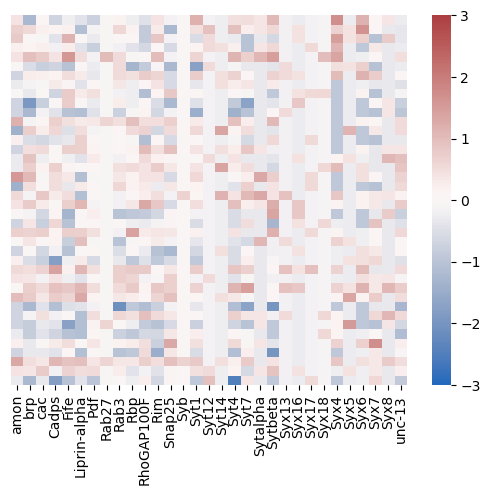

In [17]:
sns.heatmap(LNV_df,
            cmap='vlag', 
            cbar=True,
            center=0.05,
            vmin=-3,
            vmax=3, 
            yticklabels=False, 
            xticklabels=True)